In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [59]:
df=pd.read_csv('house_prices.csv')

In [60]:
df.head()

,Unnamed: 0,property_type,price,location,city,baths,purpose,bedrooms,Area_in_Marla
0,0,Flat,10000000,G-10,Islamabad,2,For Sale,2,4.0
1,1,Flat,6900000,E-11,Islamabad,3,For Sale,3,5.6
2,2,House,16500000,G-15,Islamabad,6,For Sale,5,8.0
3,3,House,43500000,Bani Gala,Islamabad,4,For Sale,4,40.0
4,4,House,7000000,DHA Defence,Islamabad,3,For Sale,3,8.0


In [86]:
# cheking more information about dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99499 entries, 0 to 99498
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   property_type  99499 non-null  object 
 1   price          99499 non-null  int64  
 2   location       99499 non-null  object 
 3   city           99499 non-null  object 
 4   baths          99499 non-null  int64  
 5   purpose        99499 non-null  object 
 6   bedrooms       99499 non-null  int64  
 7   Area_in_Marla  99499 non-null  float64
dtypes: float64(1), int64(3), object(4)
memory usage: 6.1+ MB


In [62]:
#checking duplicate values
df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
99494    False
99495    False
99496    False
99497    False
99498    False
Length: 99499, dtype: bool

In [63]:
#checking null values
df.isnull().value_counts()

Unnamed: 0  property_type  price  location  city   baths  purpose  bedrooms  Area_in_Marla
False       False          False  False     False  False  False    False     False            99499
Name: count, dtype: int64

In [64]:
#checking unique values
for i in df:
    print(i)
    print(df[i].unique())
    print('-'*100)

Unnamed: 0
[     0      1      2 ... 168438 168439 168445]
----------------------------------------------------------------------------------------------------
property_type
['Flat' 'House' 'Penthouse' 'Lower Portion' 'Upper Portion' 'Room'
 'Farm House']
----------------------------------------------------------------------------------------------------
price
[10000000  6900000 16500000 ...  1560000  9010000  1247000]
----------------------------------------------------------------------------------------------------
location
['G-10' 'E-11' 'G-15' ... 'Defence Fort' 'Sihala Valley'
 'Shahra-e-Liaquat']
----------------------------------------------------------------------------------------------------
city
['Islamabad' 'Lahore' 'Faisalabad' 'Rawalpindi' 'Karachi']
----------------------------------------------------------------------------------------------------
baths
[2 3 6 4 5 1 7]
----------------------------------------------------------------------------------------------------


Unamed column is unneccesary so we drop it

In [65]:
df.drop('Unnamed: 0',axis=1,inplace=True)

In [66]:
df.head(5)

,property_type,price,location,city,baths,purpose,bedrooms,Area_in_Marla
0,Flat,10000000,G-10,Islamabad,2,For Sale,2,4.0
1,Flat,6900000,E-11,Islamabad,3,For Sale,3,5.6
2,House,16500000,G-15,Islamabad,6,For Sale,5,8.0
3,House,43500000,Bani Gala,Islamabad,4,For Sale,4,40.0
4,House,7000000,DHA Defence,Islamabad,3,For Sale,3,8.0


Exploratory Data Analysis

What is the percentage of houses according to their purpose?

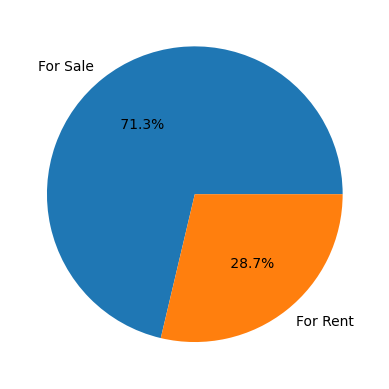

In [85]:
df['purpose'].value_counts().plot.pie(autopct='% 1.1f%%')
plt.ylabel('')
plt.show()

How does the price distribution vary by number of bedrooms?

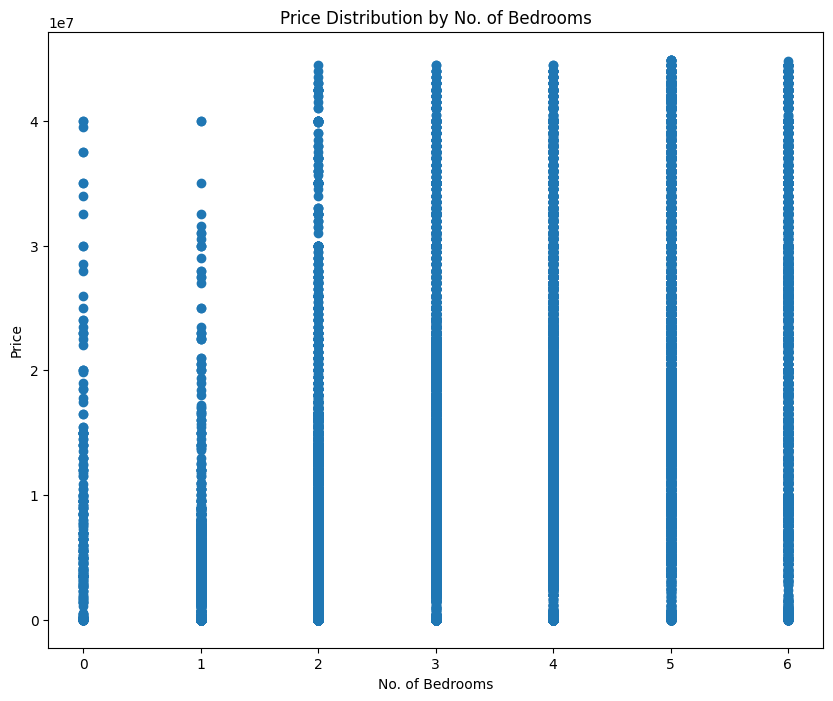

In [76]:
plt.figure(figsize=(10, 8))
plt.scatter(x=df['bedrooms'],y=df['price'])
plt.xlabel('No. of Bedrooms')
plt.ylabel('Price')
plt.title('Price Distribution by No. of Bedrooms')
plt.show()

How does the price distribution vary among property type?

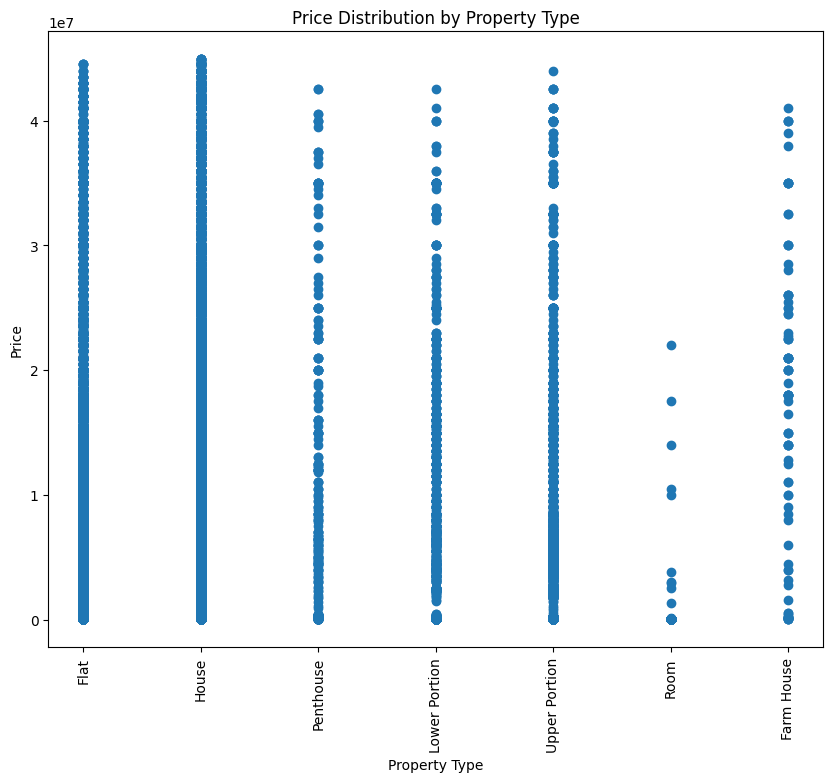

In [71]:
plt.figure(figsize=(10, 8))
plt.scatter(x=df['property_type'],y=df['price'])
plt.xticks(rotation=90)
plt.xlabel('Property Type')
plt.ylabel('Price')
plt.title('Price Distribution by Property Type')
plt.show()

How does the price distribution vary by location?

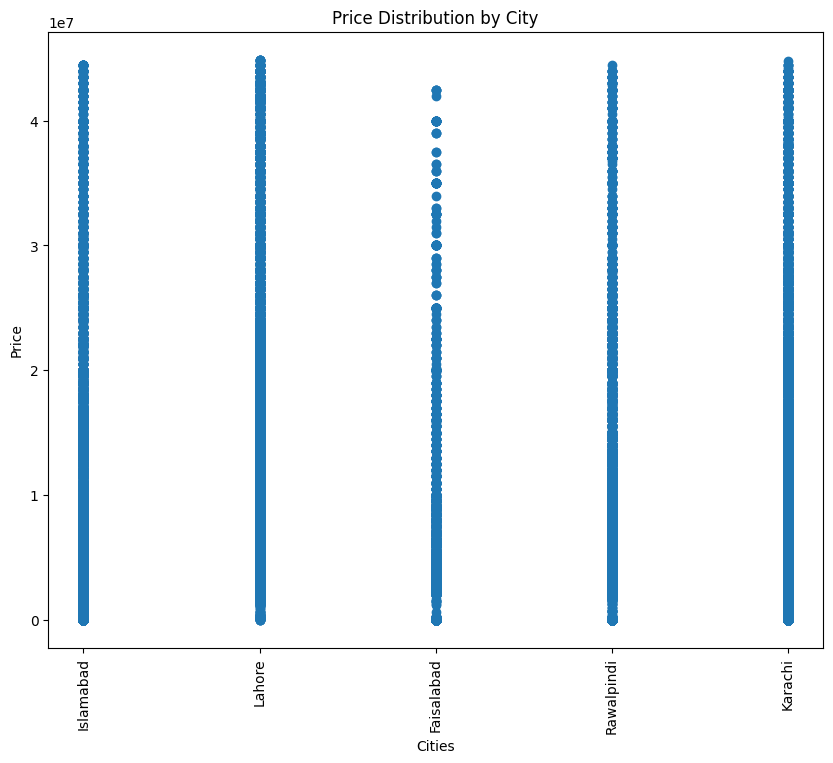

In [74]:
plt.figure(figsize=(10, 8))
plt.scatter(x=df['city'],y=df['price'])
plt.xticks(rotation=90)
plt.xlabel('Cities')
plt.ylabel('Price')
plt.title('Price Distribution by City')
plt.show()

Encoding

In [16]:
cat_df=df.select_dtypes(['object'])

In [17]:
num_df=df.select_dtypes(['int','float'])

In [20]:
#importing libraries for label encoding
from sklearn.preprocessing import LabelEncoder

In [21]:
le=LabelEncoder()

In [22]:
for i in cat_df:
    cat_df[i]=le.fit_transform(cat_df[i])

In [23]:
cat_df.head()

,property_type,location,city,purpose
0,1,452,1,1
1,1,382,1,1
2,2,457,1,1
3,2,198,1,1
4,2,327,1,1


In [31]:
cat_df.value_counts()

property_type  location  city  purpose
2              189       2     1          3933
               327       3     1          3547
               188       3     1          3428
1              189       2     1          2277
2              190       4     1          2194
                                          ... 
               921       3     1             1
3              438       4     0             1
               440       4     0             1
               451       4     0             1
0              2         1     0             1
Name: count, Length: 3108, dtype: int64

In [32]:
num_df.head()

,price,baths,bedrooms,Area_in_Marla
0,10000000,2,2,4.0
1,6900000,3,3,5.6
2,16500000,6,5,8.0
3,43500000,4,4,40.0
4,7000000,3,3,8.0


In [34]:
df=pd.concat([cat_df,num_df],axis=1)

In [35]:
df.head()

,property_type,location,city,purpose,price,baths,bedrooms,Area_in_Marla
0,1,452,1,1,10000000,2,2,4.0
1,1,382,1,1,6900000,3,3,5.6
2,2,457,1,1,16500000,6,5,8.0
3,2,198,1,1,43500000,4,4,40.0
4,2,327,1,1,7000000,3,3,8.0


In [38]:
x=df.drop('price',axis=1)
x

,property_type,location,city,purpose,baths,bedrooms,Area_in_Marla
0,1,452,1,1,2,2,4.0
1,1,382,1,1,3,3,5.6
2,2,457,1,1,6,5,8.0
3,2,198,1,1,4,4,40.0
4,2,327,1,1,3,3,8.0
...,...,...,...,...,...,...,...
99494,1,189,2,1,3,3,8.0
99495,2,189,2,1,4,3,8.0
99496,2,189,2,1,3,3,8.0
99497,2,189,2,1,4,4,14.0


In [39]:
y=df['price']
y

0        10000000
1         6900000
2        16500000
3        43500000
4         7000000
           ...   
99494     7500000
99495     8800000
99496    14000000
99497    14000000
99498     9000000
Name: price, Length: 99499, dtype: int64

In [46]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,classification_report

In [49]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.30,random_state=1)

In [50]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(xtrain,ytrain)
ypred=lr.predict(xtest)

In [51]:
ypred

array([12896200.21823326,  1743021.00758078, 13445267.85254978, ...,
       24037785.63062435,  9622679.59902932, 14014862.25651173])

In [52]:
#accuracy
r2_score(ypred,ytest)

0.31909384343369407

In [54]:
print("training accuracy:",lr.score(xtrain,ytrain))

training accuracy: 0.5872806700743294


In [55]:
print("testing accuracy:",lr.score(xtest,ytest))

testing accuracy: 0.5908536523205998
